This is an example for Na I D equivalent width (EW) estimation.

In [2]:
from sn_line_vel.SpectrumSN import SpectrumSN

import pymc as pm
import arviz as az
import numpy as np

# read spec data
z = 0.0307
spec = './test_data/host_20220331_Keck2_corrected.ascii'
Spec = SpectrumSN(spec, 0, 5000/2100)

# Na I D

<AxesSubplot:>

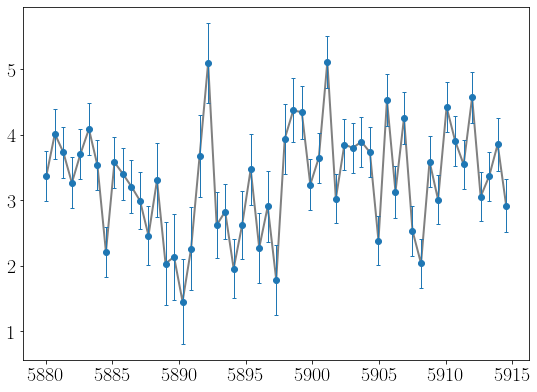

In [3]:
Spec.plot_line_region(5880, 5915)

In [4]:
Spec.add_line("NaI_D", 5880, 5910, lines=[[5889.950, 5895.924]], rel_strength=[[2, 1]])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 22 seconds.


             mean      sd  hdi_16%  hdi_84%  mcse_mean  mcse_sd  ess_bulk  \
v_mean[0] -46.366  49.112  -81.959   -3.449      1.072    0.986  2837.329   
v_sig[0]   14.601  16.619    0.896   15.349      0.280    0.207  3751.091   
A[0]      -50.539  14.757  -67.655  -37.922      0.374    0.264  1570.120   
sigma_0     0.187   0.032    0.151    0.212      0.001    0.000  2491.956   
EW_0        2.590   0.721    2.005    3.423      0.018    0.013  1666.472   

           ess_tail  r_hat  
v_mean[0]  1735.359  1.001  
v_sig[0]   2393.090  1.000  
A[0]       1468.903  1.002  
sigma_0    2555.347  1.002  
EW_0       1657.342  1.002  


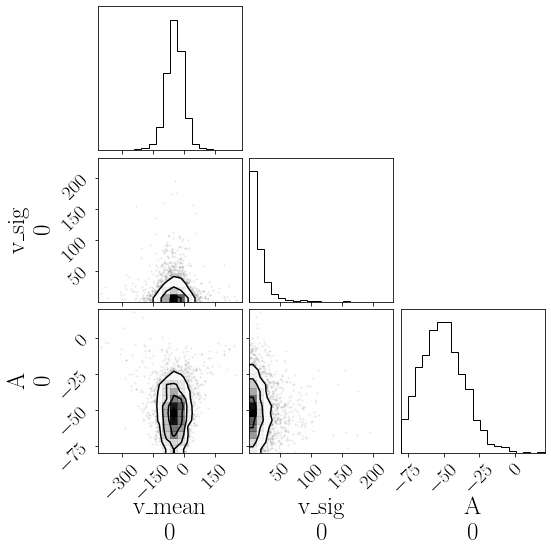

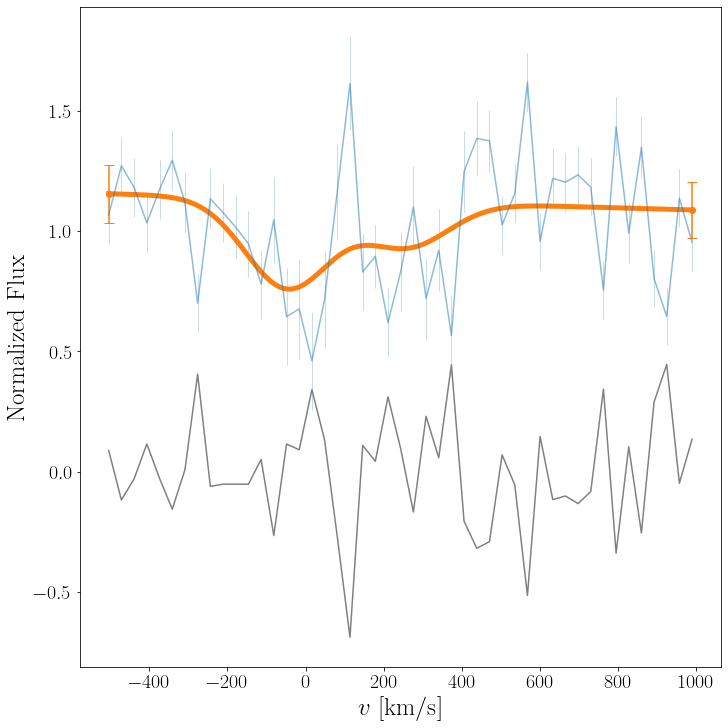

In [8]:
trace_NaI, Model_NaI, ax = Spec.line["NaI_D"].MCMC_sampler(
    vel_mean_mu=[0],
    vel_mean_sig=[2e2],
    ln_vel_sig_mu=np.log([2e2]),
    ln_vel_sig_sig=[1],
    A_lim=[-8e1, 8e1],
    target_accept=0.95,
    plot_mcmc=True,
    initial=(1,1,0,5,-1e1)
)

# H$\alpha$

<AxesSubplot:>

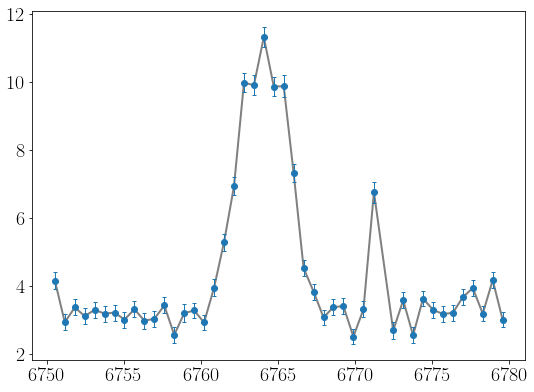

In [12]:
Spec.plot_line_region(6750, 6780)

In [24]:
Spec.add_line("Halpha", 6755, 6770, lines=[[6562.8]], rel_strength=[[1]])

/Users/chang/Desktop/sn_line_velocities/sn_line_vel/SpecLine.py:653: UserWarning: <=5 points within the wavelength range!
  warnings.warn("<=5 points within the wavelength range!")


Auto-assigning NUTS sampler...
INFO:pymc:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]
INFO:pymc:NUTS: [blue_fl, red_fl, A, v_mean, ln_v_sig, sigma_0]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 19 seconds.
INFO:pymc:Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 19 seconds.


               mean      sd   hdi_16%   hdi_84%  mcse_mean  mcse_sd  ess_bulk  \
v_mean[0]  9051.326   7.462  9044.611  9059.058      0.132    0.093  3275.612   
v_sig[0]      8.983   7.570     0.236    10.855      0.130    0.092  2513.607   
A[0]        504.318  35.046   474.929   542.883      0.638    0.451  3033.891   
sigma_0       0.306   0.057     0.244     0.348      0.001    0.001  2807.476   
EW_0        -11.410   1.133   -12.543   -10.320      0.021    0.015  2936.149   

           ess_tail  r_hat  
v_mean[0]  2254.274  1.000  
v_sig[0]   1832.352  1.002  
A[0]       2695.196  1.001  
sigma_0    2602.756  1.000  
EW_0       2477.227  1.002  


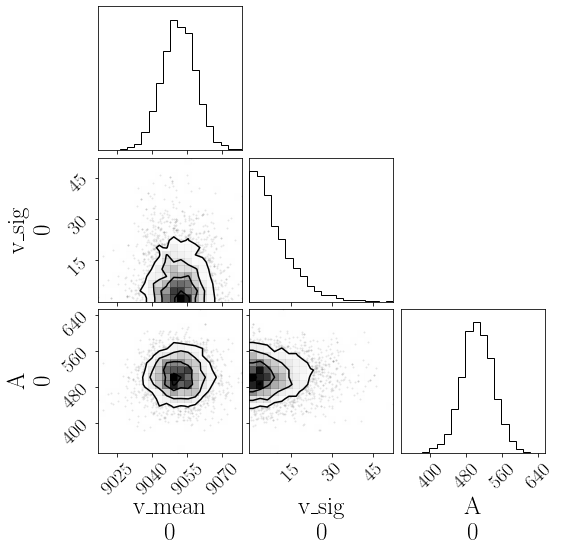

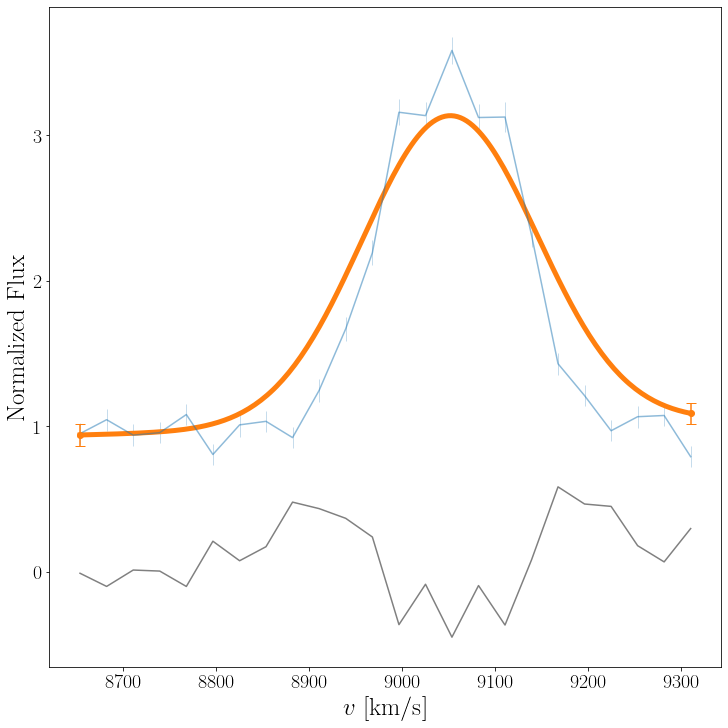

In [26]:
trace_H, Model_H, ax = Spec.line["Halpha"].MCMC_sampler(
    vel_mean_mu=[1e4],
    vel_mean_sig=[1e3],
    ln_vel_sig_mu=np.log([1e2]),
    ln_vel_sig_sig=[2],
    A_lim=[0, 1e5],
    # target_accept=0.95,
    plot_mcmc=True,
    initial=(1,1,1e4,7,1e3)
)